# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

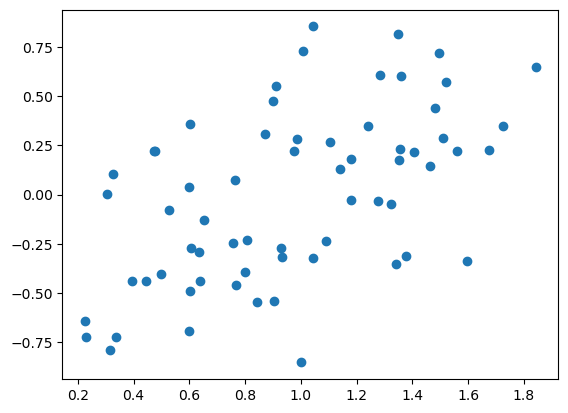

In [3]:
plt.scatter(x.T[0], y)

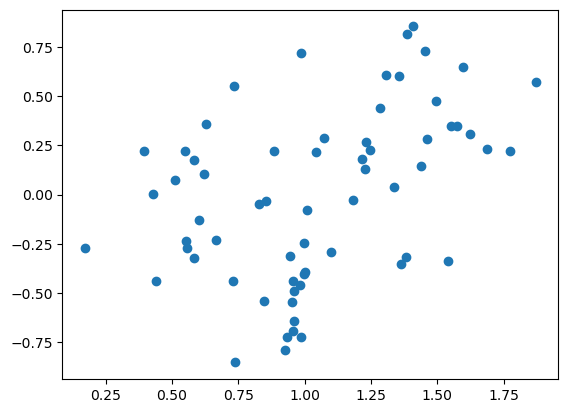

In [4]:
plt.scatter(x.T[1], y)

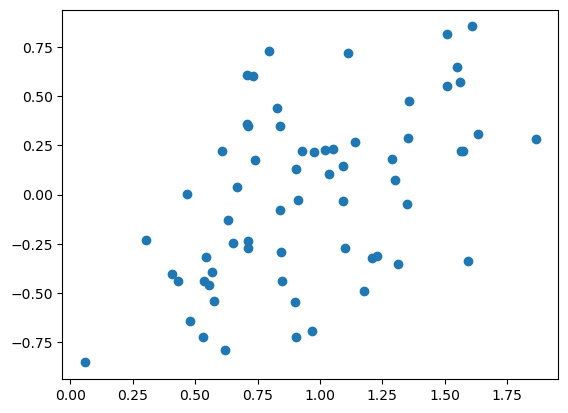

In [5]:
plt.scatter(x.T[2], y)

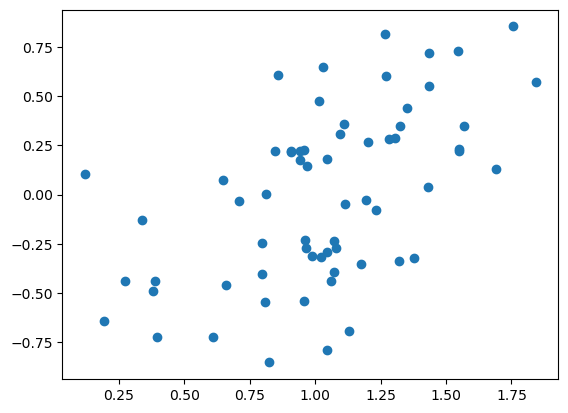

In [6]:
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [7]:
left = np.linalg.inv(np.dot(x.T, x))

In [8]:
right = np.dot(y.T, x)

In [9]:
np.dot(left, right)

array([ 0.26960045,  0.02493533,  0.28817255,  0.34235682, -0.92296278])

In [10]:
model1 = np.linalg.lstsq(x, y, rcond=None)[0]
model1

array([ 0.26960045,  0.02493533,  0.28817255,  0.34235682, -0.92296278])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

In [11]:
pred_mod1 = np.dot(x, model1)

Text(0.5, 1.0, 'Prediction of X1 on Y')

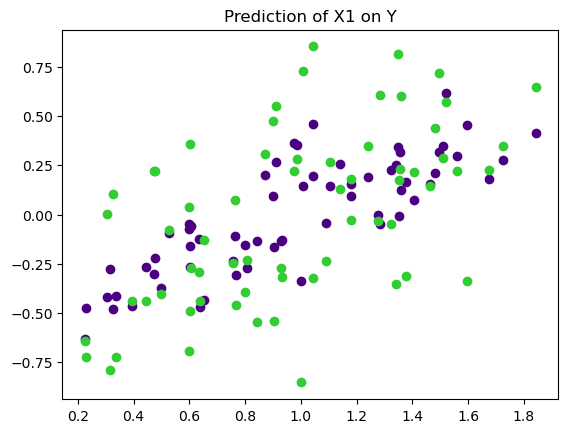

In [12]:
plt.scatter(x.T[0], pred_mod1, c = "indigo")
plt.scatter(x.T[0], y, c = "limegreen")
plt.title("Prediction of X1 on Y")

Text(0.5, 1.0, 'Prediction of X2 on Y')

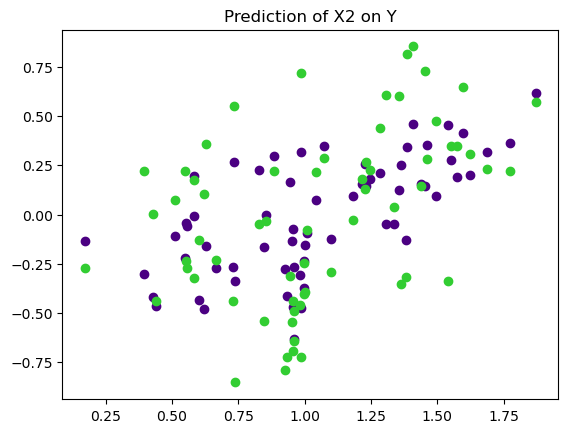

In [13]:
plt.scatter(x.T[1], pred_mod1, c = "indigo")
plt.scatter(x.T[1], y, c = "limegreen")
plt.title("Prediction of X2 on Y")

Text(0.5, 1.0, 'Prediction of X3 on Y')

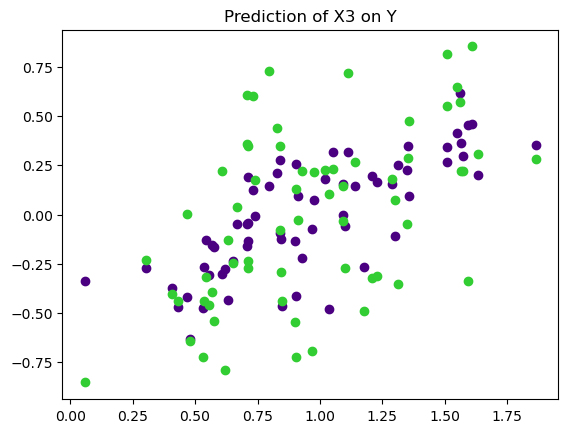

In [14]:
plt.scatter(x.T[2], pred_mod1, c = "indigo")
plt.scatter(x.T[2], y, c = "limegreen")
plt.title("Prediction of X3 on Y")

Text(0.5, 1.0, 'Prediction of X4 on Y')

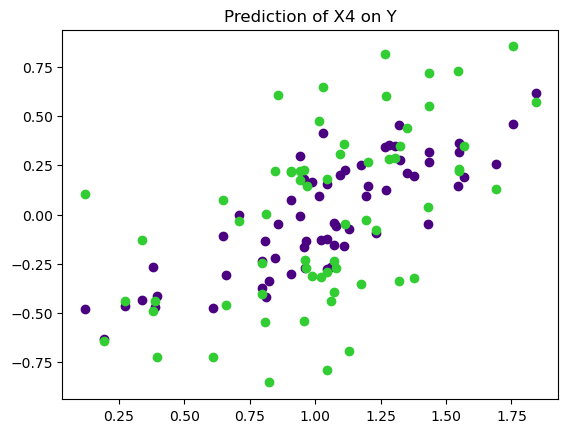

In [15]:
plt.scatter(x.T[3], pred_mod1, c = "indigo")
plt.scatter(x.T[3], y, c = "limegreen")
plt.title("Prediction of X4 on Y")

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [16]:
import pandas as pd
import numpy as np
credit = pd.read_csv('/Users/emily/OneDrive/Documents/GitHub/mlnn/data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [17]:
columns = ['Income', 'Limit', 'Cards', 'Age', 'Education', 'Balance']
z = credit[columns].values

z = np.vstack([z.T, np.ones(len(z))]).T
z

array([[1.48910e+01, 3.60600e+03, 2.00000e+00, ..., 1.10000e+01,
        3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 3.00000e+00, ..., 1.50000e+01,
        9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 4.00000e+00, ..., 1.10000e+01,
        5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 5.00000e+00, ..., 1.20000e+01,
        1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00, ..., 1.30000e+01,
        0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 5.00000e+00, ..., 7.00000e+00,
        9.66000e+02, 1.00000e+00]])

In [18]:
rating = credit['Rating']
rating

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [19]:
model2 = np.linalg.lstsq(z, rating, rcond=None)[0]
model2

array([ 9.48157743e-02,  6.42304413e-02,  4.67706085e+00,  8.06617460e-03,
       -2.30863025e-01,  8.18115721e-03,  3.10522106e+01])

In [20]:
pred2 = np.dot(z, model2)

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

Text(0.5, 0, 'Credit Rating')

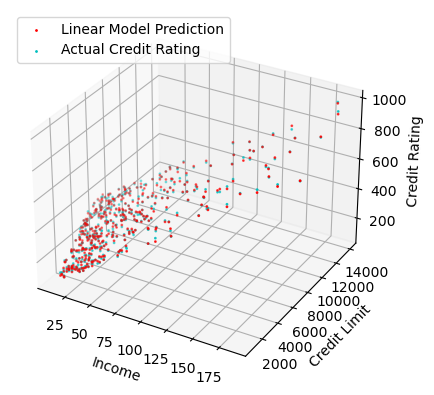

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(z.T[0], z.T[1], pred2, c="r", s=1, label="Linear Model Prediction")
ax.scatter(z.T[0], z.T[1], rating, c='c', s=1, label="Actual Credit Rating")
ax.legend(loc="upper left")
ax.set_xlabel("Income")
ax.set_ylabel("Credit Limit")
ax.set_zlabel("Credit Rating")

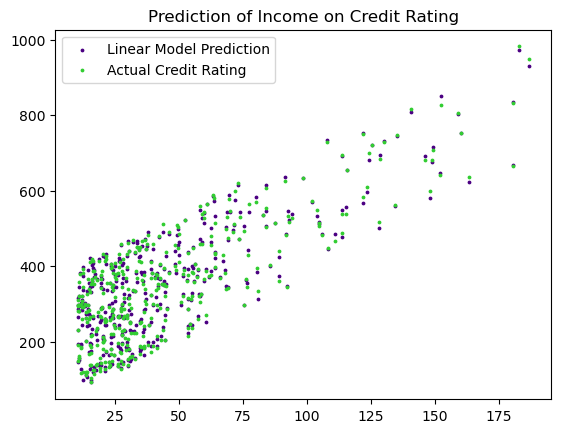

In [22]:
plt.scatter(z.T[0], pred2, c = "indigo", s=3, label="Linear Model Prediction")
plt.scatter(z.T[0], rating, c = "limegreen", s=3, label="Actual Credit Rating")
plt.title("Prediction of Income on Credit Rating")
plt.legend(loc="upper left")

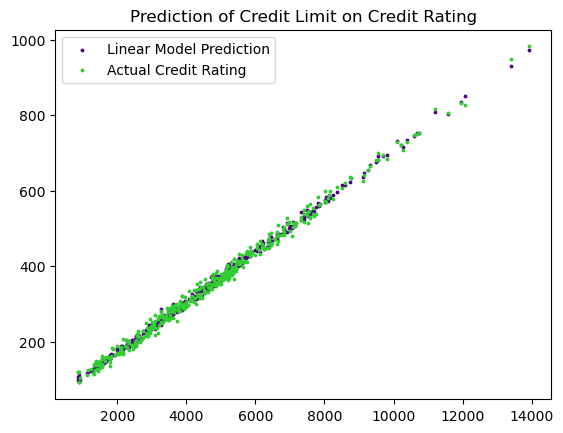

In [23]:
plt.scatter(z.T[1], pred2, c = "indigo", s=3, label="Linear Model Prediction")
plt.scatter(z.T[1], rating, c = "limegreen", s=3, label="Actual Credit Rating")
plt.title("Prediction of Credit Limit on Credit Rating")
plt.legend(loc="upper left")

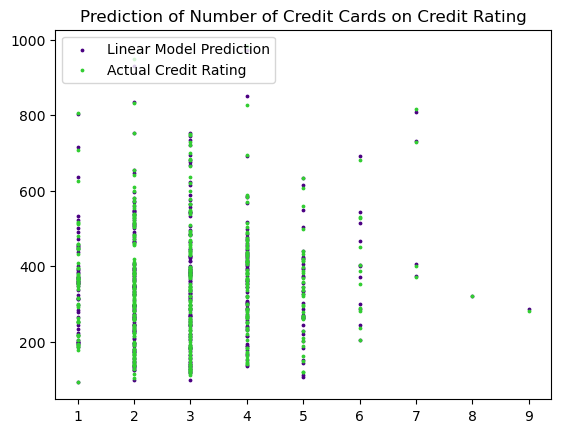

In [24]:
plt.scatter(z.T[2], pred2, c = "indigo", s=3, label="Linear Model Prediction")
plt.scatter(z.T[2], rating, c = "limegreen", s=3, label="Actual Credit Rating")
plt.title("Prediction of Number of Credit Cards on Credit Rating")
plt.legend(loc="upper left")

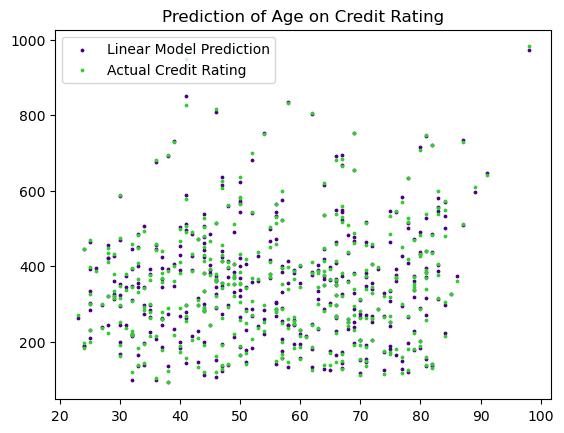

In [25]:
plt.scatter(z.T[3], pred2, c = "indigo", s=3, label="Linear Model Prediction")
plt.scatter(z.T[3], rating, c = "limegreen", s=3, label="Actual Credit Rating")
plt.title("Prediction of Age on Credit Rating")
plt.legend(loc="upper left")

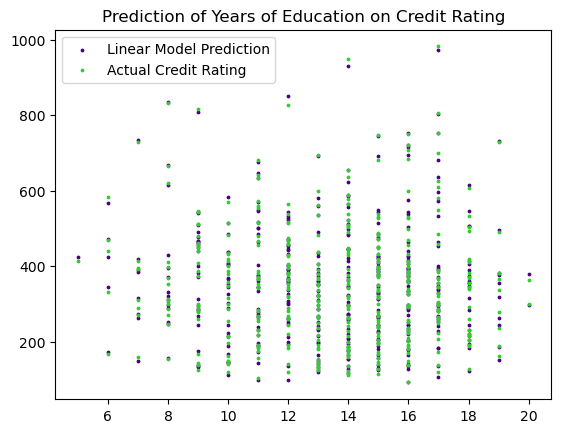

In [26]:
plt.scatter(z.T[4], pred2, c = "indigo", s=3, label="Linear Model Prediction")
plt.scatter(z.T[4], rating, c = "limegreen", s=3, label="Actual Credit Rating")
plt.title("Prediction of Years of Education on Credit Rating")
plt.legend(loc="upper left")

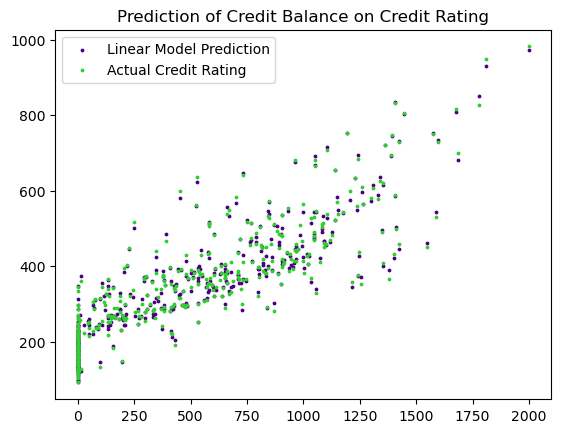

In [27]:
plt.scatter(z.T[5], pred2, c = "indigo", s=3, label="Linear Model Prediction")
plt.scatter(z.T[5], rating, c = "limegreen", s=3, label="Actual Credit Rating")
plt.title("Prediction of Credit Balance on Credit Rating")
plt.legend(loc="upper left")